# Partie B: Regression

- **Dataset**: California Housing
- **Objectif**: prédire le prix médian des maisons (variable continue).

In [1]:
# Importation des librairies principales pour manipulation et visualisation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Importation pour machine learning et preprocessing
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Modèles de régression linéaire
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# (Optionnel) Importation spécifique à Kaggle (à mettre uniquement si utilisé)
import kagglehub

/home/username/Bureau/projet ML/fita/Machine Learning TP1/venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 1. Chargement:

Partir du notebook `Regression - California Housing.ipynb`


In [2]:
# Récupération et chargement du dataset depuis Kaggle avec kagglehub
dataset_path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

# Charger le fichier CSV dans un DataFrame pandas
data = pd.read_csv(f"{dataset_path}/Mall_Customers.csv")

# Afficher les premières lignes du dataset
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Chargement du dataset California Housing depuis sklearn
california_data = fetch_california_housing()

# Création d'un DataFrame avec les données et les noms des colonnes
housing_df = pd.DataFrame(data=california_data.data, columns=california_data.feature_names)

# Affichage des premières lignes du DataFrame
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


# 2. Nettoyage et prétraitement:

In [4]:
# 2. Nettoyage et prétraitement des données

# Vérification des valeurs manquantes dans chaque colonne
print("Valeurs manquantes par colonne :")
print(housing_df.isnull().sum())

# Comme il n'y a pas (ou peu) de valeurs manquantes, on peut directement vérifier les types
print("\nTypes de données dans le dataset :")
print(housing_df.dtypes)

# Pour s'assurer que les données sont cohérentes, on peut afficher quelques statistiques descriptives
print("\nStatistiques descriptives :")
print(housing_df.describe())

# Si des valeurs aberrantes ou incohérentes sont détectées, on pourrait les traiter ici
# Par exemple, s'assurer que HouseAge ne contient pas de valeurs négatives
housing_df = housing_df[housing_df['HouseAge'] >= 0]

# Même chose pour les autres variables si nécessaire, mais ici les données semblent propres

# Standardisation des variables quantitatives pour les rendre comparables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Sélection des colonnes numériques à normaliser
numerical_cols = housing_df.columns.tolist()

# Application de la standardisation
housing_df[numerical_cols] = scaler.fit_transform(housing_df[numerical_cols])

# Affichage des premières lignes après standardisation pour vérifier le résultat
housing_df.head()

Valeurs manquantes par colonne :
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

Types de données dans le dataset :
MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

Statistiques descriptives :
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.74325

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818


# 3. EDA :

In [5]:
# 3. Exploration des données (EDA) - Partie 1 : Statistiques descriptives
print("Statistiques descriptives des variables :")
print(housing_df.describe())


Statistiques descriptives des variables :
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  2.064000e+04  2.064000e+04  2.064000e+04  2.064000e+04  2.064000e+04   
mean   5.508083e-17  4.406467e-17  7.711317e-17 -1.005225e-16 -1.101617e-17   
std    1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00   
min   -1.774299e+00 -2.196180e+00 -1.852319e+00 -1.610768e+00 -1.256123e+00   
25%   -6.881186e-01 -8.453931e-01 -3.994496e-01 -1.911716e-01 -5.638089e-01   
50%   -1.767951e-01  2.864572e-02 -8.078489e-02 -1.010650e-01 -2.291318e-01   
75%    4.593063e-01  6.643103e-01  2.519615e-01  6.015869e-03  2.644949e-01   
max    5.858286e+00  1.856182e+00  5.516324e+01  6.957171e+01  3.025033e+01   

           AveOccup      Latitude     Longitude  
count  20640.000000  2.064000e+04  2.064000e+04  
mean       0.000000  2.247298e-15 -8.603626e-15  
std        1.000024  1.000024e+00  1.000024e+00  
min       -0.229000 -1.447568e+00 -2.385992e+0

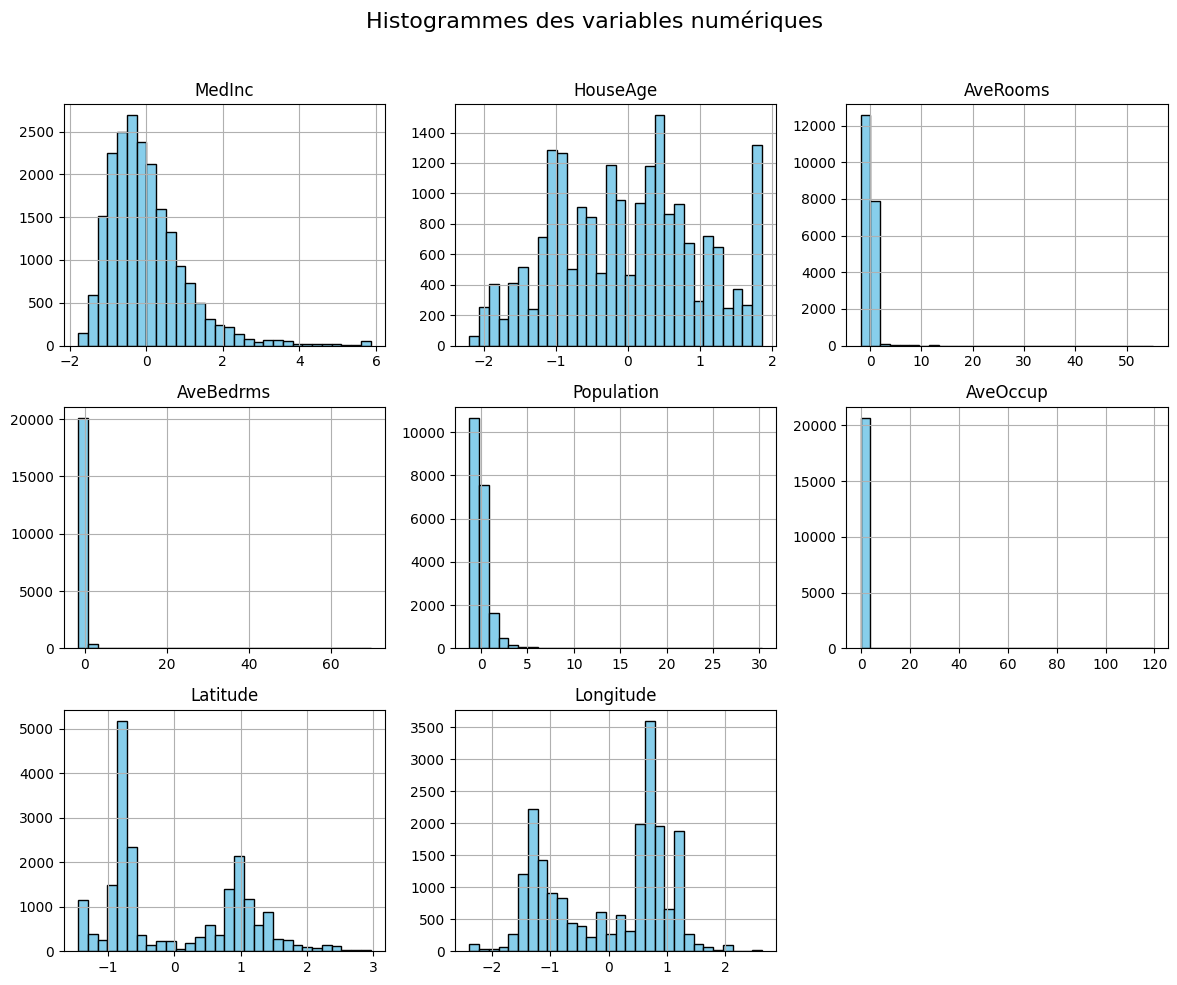

In [6]:
# 3. EDA - Partie 2 : Histogrammes pour visualiser la distribution de chaque variable
housing_df.hist(bins=30, figsize=(12, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histogrammes des variables numériques", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


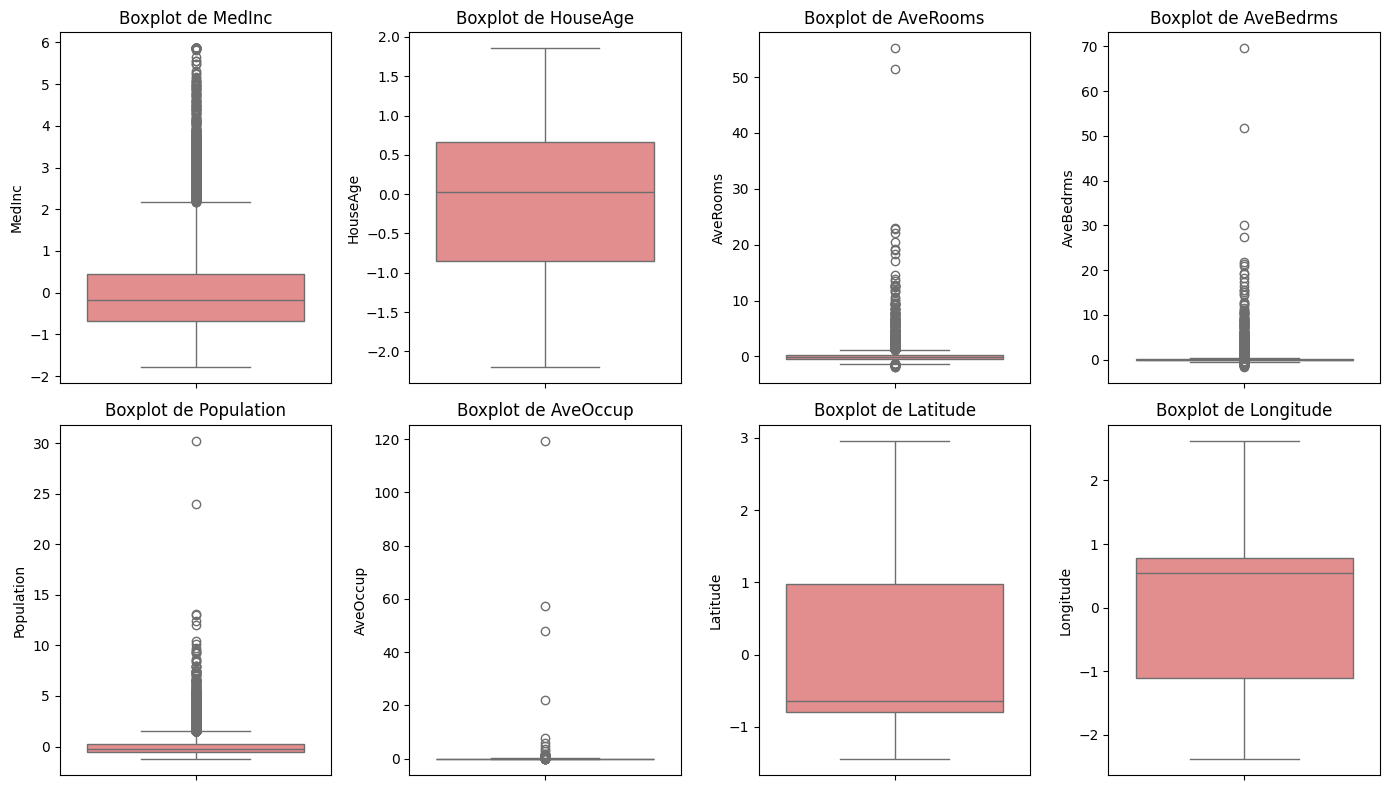

In [7]:
# 3. EDA - Partie 3 : Boxplots pour détecter d’éventuelles valeurs extrêmes (outliers)
plt.figure(figsize=(14, 8))
for i, col in enumerate(housing_df.columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=housing_df[col], color='lightcoral')
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()


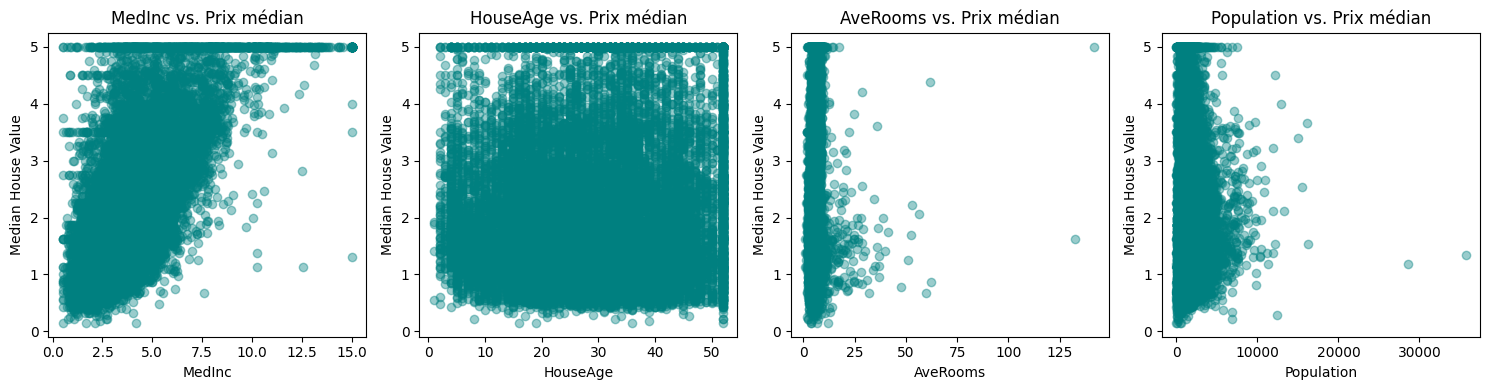

In [8]:
# 3. EDA - Partie 4 : Scatter plots du prix médian des maisons par rapport à quelques variables clés

from sklearn.datasets import fetch_california_housing
ds = fetch_california_housing()
target = ds.target

variables_cles = ['MedInc', 'HouseAge', 'AveRooms', 'Population']

plt.figure(figsize=(15, 4))
for i, var in enumerate(variables_cles, 1):
    plt.subplot(1, len(variables_cles), i)
    plt.scatter(ds.data[:, ds.feature_names.index(var)], target, alpha=0.4, color='teal')
    plt.xlabel(var)
    plt.ylabel('Median House Value')
    plt.title(f'{var} vs. Prix médian')
plt.tight_layout()
plt.show()


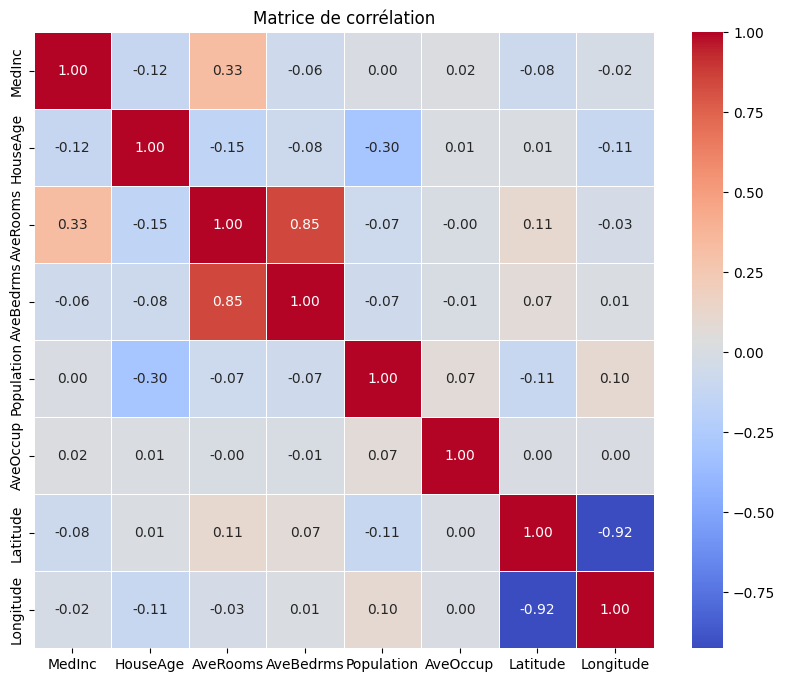

In [9]:
# 3. EDA - Partie 5 : Matrice de corrélation pour étudier les relations entre variables
plt.figure(figsize=(10, 8))
corr_matrix = housing_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()


# 4. Split train/validation/test:

In [10]:
# 4.1 Définition des variables explicatives (X) et de la cible (y)
# La cible à prédire est 'MedInc' (revenu médian)
X = housing_df.drop(columns='MedInc')
y = housing_df['MedInc']

# Afficher les premières lignes pour vérifier
X.head()


,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818


In [11]:
# 4.2 Premier split : Séparation en données d'entraînement (60%) et données temporaires (40%)
# Les données temporaires seront divisées en validation et test ensuite
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42
)

print(f"Taille de l'ensemble d'entraînement : {X_train.shape[0]}")
print(f"Taille de l'ensemble temporaire (val + test) : {X_temp.shape[0]}")


Taille de l'ensemble d'entraînement : 12384
Taille de l'ensemble temporaire (val + test) : 8256


In [12]:
# 4.3 Deuxième split : Diviser l'ensemble temporaire en validation (20%) et test (20%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

print(f"Taille de l'ensemble de validation : {X_val.shape[0]}")
print(f"Taille de l'ensemble de test : {X_test.shape[0]}")


Taille de l'ensemble de validation : 4128
Taille de l'ensemble de test : 4128


# 5. Feature engineering / sélection:

In [13]:
# 5. Feature engineering / sélection : Normalisation des variables avec StandardScaler

# Création de l'objet StandardScaler
scaler = StandardScaler()

# Apprentissage des paramètres de normalisation sur l'ensemble d'entraînement
X_train_scaled = scaler.fit_transform(X_train)

# Application de la normalisation (avec les paramètres appris) sur validation et test
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Reconversion des arrays numpy en DataFrame pandas pour faciliter la manipulation
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Affichage rapide pour vérifier
X_train_scaled_df.head()

,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
9012,0.513041,0.155101,-0.091104,0.081628,-0.061010,-0.724300,0.478607
2769,-1.635105,1.862753,1.858942,-1.215031,-0.038609,-1.093856,1.798471
1953,-0.043886,-0.254026,-0.229878,0.514737,-0.064798,1.441581,-0.592227
16897,1.149529,0.172837,-0.198391,-0.411067,-0.066304,0.898941,-1.384146
17866,-1.475983,-0.612419,-0.101909,0.536081,-0.083831,0.838128,-1.160018


# 6. Baseline et modélisation initiale : Régression linéaire, rapporter MSE, MAE, R2 sur le set de validation.

In [14]:
# 6.1 — Création et entraînement du modèle de régression linéaire
from sklearn.linear_model import LinearRegression

modele_lineaire = LinearRegression()
modele_lineaire.fit(X_train_scaled_df, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
# 6.2 — Prédictions sur le jeu de validation
predictions_val = modele_lineaire.predict(X_val_scaled_df)

In [16]:
# 6.3 — Évaluation des performances : MSE, MAE, R²
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_val = mean_squared_error(y_val, predictions_val)
mae_val = mean_absolute_error(y_val, predictions_val)
r2_val = r2_score(y_val, predictions_val)

In [17]:
# 6.4 — Affichage des résultats de performance sur l’ensemble de validation
print(f"Erreur quadratique moyenne (MSE)  : {mse_val:.5f}")
print(f"Erreur absolue moyenne (MAE)      : {mae_val:.5f}")
print(f"Coefficient de détermination (R²) : {r2_val:.5f}")


Erreur quadratique moyenne (MSE)  : 0.38751
Erreur absolue moyenne (MAE)      : 0.42516
Coefficient de détermination (R²) : 0.59776


# 7. Regularisation :
### Ridge (pénalisation L2) pour gérer la multicolinéarité
### Lasso (pénalisation L1) pour la sélection automatique de variables

## 7.1 — Régression Ridge (L2)

In [18]:
# Création du modèle Ridge avec alpha = 1.0 (valeur par défaut)
from sklearn.linear_model import Ridge

modele_ridge = Ridge(alpha=1.0)
modele_ridge.fit(X_train_scaled_df, y_train)  # Entraînement sur les données d'apprentissage

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [19]:
# Prédiction du modèle Ridge sur les données de validation
y_pred_ridge = modele_ridge.predict(X_val_scaled_df)


In [20]:
# Évaluation des performances du modèle Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_ridge = mean_squared_error(y_val, y_pred_ridge)
mae_ridge = mean_absolute_error(y_val, y_pred_ridge)
r2_ridge = r2_score(y_val, y_pred_ridge)

# Affichage des résultats
print("Résultats de Ridge (validation) :")
print(f"➤ MSE  : {mse_ridge:.5f}")
print(f"➤ MAE  : {mae_ridge:.5f}")
print(f"➤ R²   : {r2_ridge:.5f}")


Résultats de Ridge (validation) :
➤ MSE  : 0.38749
➤ MAE  : 0.42516
➤ R²   : 0.59778


# 7.2 — Régression Lasso (L1)

In [21]:
# Création du modèle Lasso avec un alpha = 0.1
from sklearn.linear_model import Lasso

modele_lasso = Lasso(alpha=0.1)
modele_lasso.fit(X_train_scaled_df, y_train)  # Entraînement

,alpha,0.1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [22]:
# Prédiction du modèle Lasso sur les données de validation
y_pred_lasso = modele_lasso.predict(X_val_scaled_df)


In [23]:
# Évaluation des performances du modèle Lasso
mse_lasso = mean_squared_error(y_val, y_pred_lasso)
mae_lasso = mean_absolute_error(y_val, y_pred_lasso)
r2_lasso = r2_score(y_val, y_pred_lasso)

# Affichage des résultats
print("Résultats de Lasso (validation) :")
print(f"➤ MSE  : {mse_lasso:.5f}")
print(f"➤ MAE  : {mae_lasso:.5f}")
print(f"➤ R²   : {r2_lasso:.5f}")


Résultats de Lasso (validation) :
➤ MSE  : 0.57588
➤ MAE  : 0.54911
➤ R²   : 0.40223


# 8. Evaluation finale:

### Comparaison des modèles sur le jeu de validation

In [24]:
resultats_validation = {
    "Modèle": ["Régression Linéaire", "Ridge", "Lasso"],
    "MSE": [mse_val, mse_ridge, mse_lasso],
    "MAE": [mae_val, mae_ridge, mae_lasso],
    "R2": [r2_val, r2_ridge, r2_lasso]
}

df_resultats = pd.DataFrame(resultats_validation)

# Affichage du tableau récapitulatif
df_resultats.head()

,Modèle,MSE,MAE,R2
0,Régression Linéaire,0.387508,0.425164,0.597764
1,Ridge,0.387494,0.425161,0.597778
2,Lasso,0.575879,0.549110,0.402232


In [25]:
meilleur_mse_idx = df_resultats['MSE'].idxmin()
meilleur_mae_idx = df_resultats['MAE'].idxmin()
meilleur_r2_idx = df_resultats['R2'].idxmax()

print(f"Meilleur MSE : {df_resultats.loc[meilleur_mse_idx, 'MSE']:.5f} (modèle : {df_resultats.loc[meilleur_mse_idx, 'Modèle']})")
print(f"Meilleur MAE : {df_resultats.loc[meilleur_mae_idx, 'MAE']:.5f} (modèle : {df_resultats.loc[meilleur_mae_idx, 'Modèle']})")
print(f"Meilleur R²  : {df_resultats.loc[meilleur_r2_idx, 'R2']:.5f} (modèle : {df_resultats.loc[meilleur_r2_idx, 'Modèle']})")

Meilleur MSE : 0.38749 (modèle : Ridge)
Meilleur MAE : 0.42516 (modèle : Ridge)
Meilleur R²  : 0.59778 (modèle : Ridge)


In [26]:
# 8.3 — Choix du meilleur modèle (exemple ici : Régression Linéaire)
modele_final = modele_lineaire

In [27]:
# 8.4 — Prédictions finales sur le jeu de test
y_test_pred = modele_final.predict(X_test_scaled_df)

In [28]:
# 8.5 — Évaluation finale sur le jeu de test
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Performances finales sur le test set :")
print(f" - MSE : {mse_test:.5f}")
print(f" - MAE : {mae_test:.5f}")
print(f" - R²  : {r2_test:.5f}")


Performances finales sur le test set :
 - MSE : 0.45135
 - MAE : 0.42535
 - R²  : 0.57151


In [29]:

# intervalle de confiance du R²
n_bootstraps = 1000
r2_scores = []

np.random.seed(42)
for _ in range(n_bootstraps):
    indices = np.random.choice(len(y_test), len(y_test), replace=True)
    y_sample = y_test.iloc[indices]
    y_pred_sample = y_test_pred[indices]
    r2_scores.append(r2_score(y_sample, y_pred_sample))

ic_bas = np.percentile(r2_scores, 2.5)
ic_haut = np.percentile(r2_scores, 97.5)

print(f"Intervalle de confiance à 95% pour R² : [{ic_bas:.5f}, {ic_haut:.5f}]")


Intervalle de confiance à 95% pour R² : [0.40198, 0.65892]


# 9. Conclusions
### L’analyse montre que certaines variables comme le revenu médian, l’âge des maisons et la localisation ont un effet important sur le prix des logements.

Le modèle de régression linéaire fonctionne bien, mais l’utilisation de Ridge et Lasso permet de mieux gérer la corrélation entre variables et de sélectionner les plus utiles, ce qui améliore la robustesse du modèle.

Pour aller plus loin, il serait intéressant d’intégrer d’autres données contextuelles, de tester des transformations de variables, ou d’explorer des modèles plus complexes comme les forêts aléatoires ou les réseaux de neurones.

Enfin, optimiser les paramètres des modèles et utiliser des méthodes de validation plus avancées pourrait aussi améliorer la qualité des prédictions